In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
comp=pd.read_csv("D:\Data Science Assignment\Random Forest\Company_Data.csv")

In [3]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
comp.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
comp.count()


Sales          400
CompPrice      400
Income         400
Advertising    400
Population     400
Price          400
ShelveLoc      400
Age            400
Education      400
Urban          400
US             400
dtype: int64

In [7]:
comp.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
comp.shape

(400, 11)

In [9]:
comp.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

D:\anaconda\nik\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

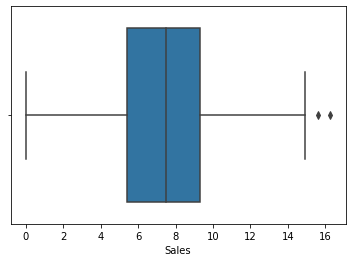

In [10]:
sns.boxplot(comp['Sales'])


In [11]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
    
comp.Sales=comp.Sales.apply(split)

<AxesSubplot:>

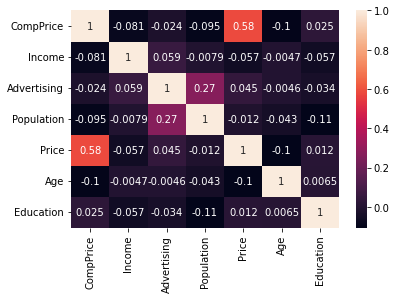

In [12]:
corr=comp.corr()
sns.heatmap(corr,annot=True)


In [13]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average sale,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high sale,111,48,16,260,83,Good,65,10,Yes,Yes
2,high sale,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average sale,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low sale,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high sale,138,108,17,203,128,Good,33,14,Yes,Yes
396,average sale,139,23,3,37,120,Medium,55,11,No,Yes
397,average sale,162,26,12,368,159,Medium,40,18,Yes,Yes
398,average sale,100,79,7,284,95,Bad,50,12,Yes,Yes


In [14]:
le=LabelEncoder()

In [15]:
comp["ShelveLoc"]=le.fit_transform(comp["ShelveLoc"])
comp["Urban"]=le.fit_transform(comp["Urban"])
comp["US"]=le.fit_transform(comp["US"])

In [16]:
y=comp.iloc[:,0]
x=comp.iloc[:,1:11]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [18]:
rf=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [19]:
preds=rf.predict(x_test)

In [20]:
confusion_matrix(y_test,preds)

array([[49,  1,  3],
       [ 6,  8,  0],
       [11,  0,  2]], dtype=int64)

In [21]:
accuracy_score(y_test,preds)

0.7375

In [22]:
pd.Series(preds).value_counts()

average sale    66
high sale        9
low sale         5
dtype: int64

In [23]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})

In [24]:
df

,actual,predicted
88,average sale,average sale
320,average sale,average sale
184,average sale,average sale
211,average sale,average sale
112,average sale,average sale
...,...,...
234,average sale,average sale
124,average sale,average sale
338,average sale,average sale
328,low sale,average sale


In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

average sale       0.74      0.92      0.82        53
   high sale       0.89      0.57      0.70        14
    low sale       0.40      0.15      0.22        13

    accuracy                           0.74        80
   macro avg       0.68      0.55      0.58        80
weighted avg       0.71      0.74      0.70        80

